# <h1 style = "font-size: 40px;"><em>Final Tutorial</em></h1>
### <u>By: Julian Spencer && Eric Bloom</u>
## Published: December 12,2022<br>Last Updated: December 14,2022
----------------------------------------------------------------------------------------
### <h2>Table of Contents</h2> 
<ol style="margin: 20px; font-size: 16px;">
    <li>Introduction</li>
    <li>Data Data Wrangling 
        <ol>
            <li>Meeting the Data</li>
            <li>Data Manipulation</li>
        </ol>
    <li>Porch & Deck Correlations</li>
        <ol>
            <li>Linear Regression regarding Decks and Porches</li>
            <li>Comparing Types of Porches with Month Sold</li>
        </ol>
    <li>Porch Type Distributions</li>
        <ol>
            <li>Enclosed Porche Area VS Month Sold</li>
            <li>Screened Porch Area VS Month Sold</li>
            <li>3-Season Porch Area VS Month Sold</li>
        </ol>
    <li>FirePlace Correlation Data</li>
        <ol>
            <li>Mean Sales Prices by Fireplace and Month Sold</li>
            <li>Fireplace Qualiy VS Price of House Sold</li>
        </ol>
    <li>The Garage Trials</li>
        <ol>
            <li>Trends in Garage Types VS Month of Sale</li>
        </ol>
    <li>Cold Yet?</li>
        <ol>
            <li>Number of Houses Sold by Heating/Cooling Quality and Month</li>
        </ol>
    <li>General Sale Price VS Month of Sale Distribution</li>
        <ol>
            <li>Sale Price VS Month Scattar Plot</li>
            <li>Sale Price VS Month Violin Plot</li>
        </ol>
    <li>Conclusion</li>
</ol>



-----------------------------------------------------------------------

## <h2>1.) Introduction</h2>
<br>
<p style = "font-size: 16px;">The housing market has plenty of factors that keep the numbers changing for home sales, including <a href="https://www.nar.realtor/blogs/economists-outlook/seasonality-in-the-housing-market"><u>seasonality</u></a>. Past data shows that sales activity increase during the warmer months. We want to find out, given a particular type of house, is there anything that can make it look more appealing during different seasons? We understand there exist a variety of house types, but there are still a finite number of house amenities. We shall take a look at a sample of these features in attempts to seek a correlation between the timing and pricing of the house sold. Specifically, we want to find out what type of features make a house more valuable during certain seasons. We will focus on three amenities: fireplaces, porches/decks,and garage type. To achieve our goal, we plan to use all the skills we aquired over the semester in working with python, pandas, matplotlib, and more to analyze a dataset of home sales data.</p>
<p style = "font-size: 16px;">Overall, we believe that our analysis will provide valuable insights into the correlation between home sales and seasons, and help us understand which amenities are most valuable in different seasons. We hope that our findings will be useful for homeowners and real estate agents looking to optimize the sale of their homes.</p> 

<p style = "font-size: 16px;">Our null hypothesis is that there is no correlation with houses being sold and the amentities in which the houses contain. We will test this hypothesis using statistical analysis and machine learning techniques.</p>


<br>

--------------------------------------------------------------------------

## <h2>2.) Data Wrangling</h2><br><h3>2.A.) Meeting the Data</h3>
<br>
<p style = "font-size: 16px;">The dataset of house sales we took is from Ames, Iowa. This dataset contains over 80 columns and needs to be reduced in order to target our focus only on relevant data. The first step would be to import the data for use and to drop any columns that are not related to home amenities. In order to build an effective model, we will need to carefully identify and select the relevant columns. </p>

In [15]:
## All Imports
import folium
import requests
import csv
import pandas as pd

house_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## <h3>2.B.) Data Manipulation</h3>
<br>
<p style = "font-size: 16px;">We decided to gut a majority of the columns since they either proved to be irrelavent for proving our hypothesis, or they add little predictive power. We carefully picked through the ones we would and would not need. We ended up ridding the columns describing the house materials, location, structure details, and any other data that proved not to be well distributed. We also rename certain values and sort the data in accordance to the month sold as a convenience for plotting some of our figures. </p> 

In [16]:
#Edit months sold to calendar words not numbers (new column)
house_df = house_df.drop(columns = ["LandContour","Utilities","Street","Alley","LandSlope","MasVnrType","Condition2","Heating","Electrical","MasVnrArea","RoofMatl","BsmtFinSF2","BsmtCond","ExterCond","Foundation","GarageFinish","LowQualFinSF","Functional","YearBuilt","YearRemodAdd","ExterQual","MSSubClass","MSZoning","LotConfig","LotFrontage","LotArea","LotShape","MiscFeature","MiscVal","BldgType","HouseStyle","Neighborhood","Id","Condition1","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","BsmtFullBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","GarageYrBlt","GarageCars","FullBath","HalfBath","GarageCond","Fence","SaleType","SaleCondition","PavedDrive","GarageArea","GarageQual","PoolArea","PoolQC"])

In [17]:
house_df.rename(columns = {'3SsnPorch':'SeasonalPorch'}, inplace=True)

,HeatingQC,CentralAir,Fireplaces,FireplaceQu,GarageType,WoodDeckSF,OpenPorchSF,EnclosedPorch,SeasonalPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,Ex,Y,0,NaN,Attchd,0,61,0,0,0,2,2008,208500
1,Ex,Y,1,TA,Attchd,298,0,0,0,0,5,2007,181500
2,Ex,Y,1,TA,Attchd,0,42,0,0,0,9,2008,223500
3,Gd,Y,1,Gd,Detchd,0,35,272,0,0,2,2006,140000
4,Ex,Y,1,TA,Attchd,192,84,0,0,0,12,2008,250000


In [18]:
## Replace the initial values of the entries in the MoSold column to represent the months of the year 
## as a string
house_df['MoSold'].replace(1,'Jan',inplace=True)
house_df['MoSold'].replace(2,'Feb',inplace=True)
house_df['MoSold'].replace(3,'Mar',inplace=True)
house_df['MoSold'].replace(4,'Apr',inplace=True)
house_df['MoSold'].replace(5,'May',inplace=True)
house_df['MoSold'].replace(6,'June',inplace=True)
house_df['MoSold'].replace(7,'July',inplace=True)
house_df['MoSold'].replace(8,'Aug',inplace=True)
house_df['MoSold'].replace(9,'Sept',inplace=True)
house_df['MoSold'].replace(10,'Oct',inplace=True)
house_df['MoSold'].replace(11,'Nov',inplace=True)
house_df['MoSold'].replace(12,'Dec',inplace=True)

In [19]:
 months = { "Jan": 1,
         "Feb": 2,
         'Mar': 3,
         'Apr': 4,
         'May': 5,
         'June': 6,
         'July': 7,
         'Aug': 8,
         'Sept': 9,
         'Oct': 10,
         'Nov': 11,
         'Dec': 12,
    }

def month(series):
    
    return series.apply(lambda x: months.get(x, 1000))
        
house_df.sort_values(by=['MoSold'], key = month, inplace=True)
house_df

HeatingQC        1460
CentralAir       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
SeasonalPorch    1460
ScreenPorch      1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

## <h2>3.) Porch & Deck Correlations</h2>
<br>
<h3>3.A.) Linear Regression regarding Decks and Porches</h3>
<br>
<p style = "font-size: 16px;">The first feature we take a investigate are the porches and decks. These plots show the relationship between the sale price and the area of the porches. We first filter the data to only include houses that have a non-zero area for the respective porch type. Then, we use the scikit-learn library's LinearRegression class to fit a linear regression model to the data for each porch type. The resulting model is then used to generate predictions for porch area values between the minimum and maximum observed values. Finally, we print the slope of the fitted regression lines, and creates scatter plots of the observed data with the fitted regression lines overlaid.</p>

Slope for Wood Deck Area vs House Price Regression: 149.854728
Slope for Open Porch Area vs House Price Regression: 106.935459


/home/ebloom14/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


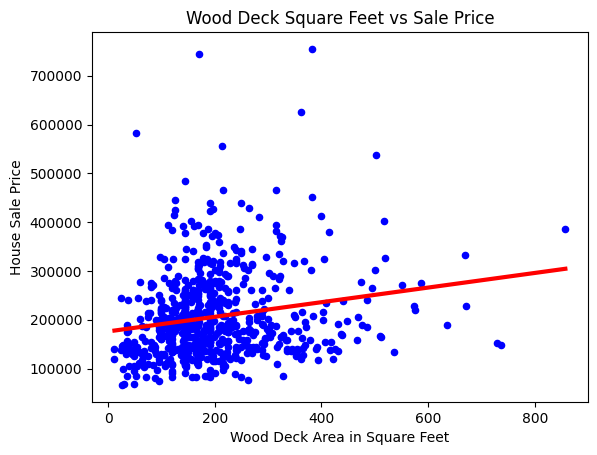

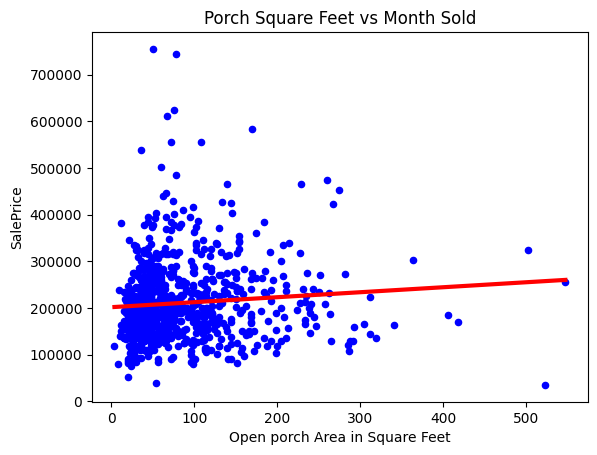

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

wood = house_df.query('WoodDeckSF != 0')
porch = house_df.query('OpenPorchSF != 0')

X_wood = wood['WoodDeckSF'].values.reshape(-1,1)
X_porch = porch['OpenPorchSF'].values.reshape(-1,1)
Y_w = wood['SalePrice'].values
Y_p = porch['SalePrice'].values

reg = LinearRegression()
reg2 = LinearRegression()

prediction_wood = np.linspace(min(X_wood), max(X_wood)).reshape(-1, 1)
prediction_porch = np.linspace(min(X_porch), max(X_porch)).reshape(-1, 1)

reg.fit(X_wood, Y_w)
reg2.fit(X_porch, Y_p)

wood_pred = reg.predict(prediction_wood)
porch_pred = reg2.predict(prediction_porch)
print('Slope for Wood Deck Area vs House Price Regression: %f'%reg.coef_[0])
print('Slope for Open Porch Area vs House Price Regression: %f'%reg2.coef_[0])

wood.plot.scatter('WoodDeckSF','SalePrice', color= 'b')
plt.plot(prediction_wood, wood_pred, color='red', linewidth=3)
plt.title("Wood Deck Square Feet vs Sale Price")
plt.xlabel('Wood Deck Area in Square Feet')
plt.ylabel('House Sale Price')
porch.plot.scatter('OpenPorchSF','SalePrice', color= 'b')
plt.plot(prediction_porch, porch_pred, color='red', linewidth=3)
plt.title("Porch Square Feet vs Month Sold")
plt.xlabel("Open porch Area in Square Feet")
plt.show()

## <h3>3.A.) Open Porches vs Wooden Deck Summary</h3>
<p style = "font-size: 16px;">With some notable exceptions, we see that the data is skewed towards having a lower average porch area, with a lower general sales price. We can also notice that on average wooden decks have more square area than an open porch. This correlates to the regression lines generated because the slope for wooden deck area vs price is slightly higher than the slope from open porch area vs price.The regression line generated has a very small increasing slope, but is increasing as the area of the portches increase.
   
    
    Based on this information, it is hard to say if having an open porch vs a wooden deck has any more influence on the price of the house by itself. But it is fairly likely that houses with larger porches will have a higher sale price. Additionally, since the data shows that the relationship between open porch area and sale price is weak, it may prove more useful to focus on seasonal purchasing trends.</p>

## <h3>3.B.) Comparing Types of Porches with Month Sold</h3>
<br>
<p style = "font-size: 16px;">The purpose of this code is to create scatter plots of three different porch areas (enclosed, screened, and 3-season) versus the month in which the house was sold. The data is filtered to only include houses that have a non-zero area for the respective porch type, and the resulting data is plotted using matplotlib's scatter() function. The color of each plotted point corresponds to the porch type (enclosed porches are red, screened porches are blue, and 3-season porches are green). 

/home/ebloom14/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Area in Square Feet')

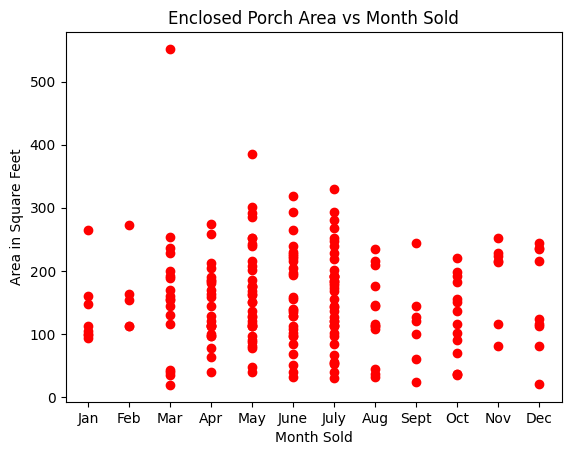

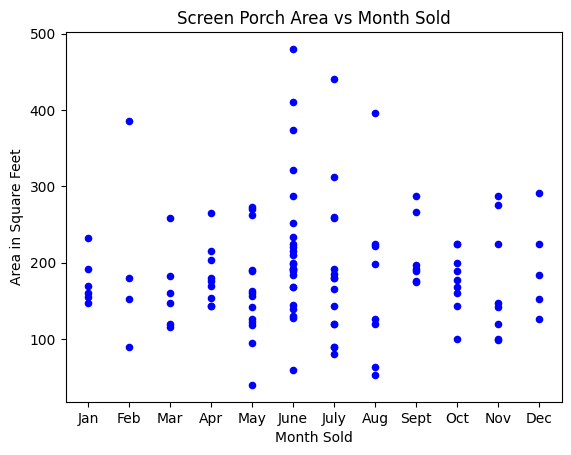

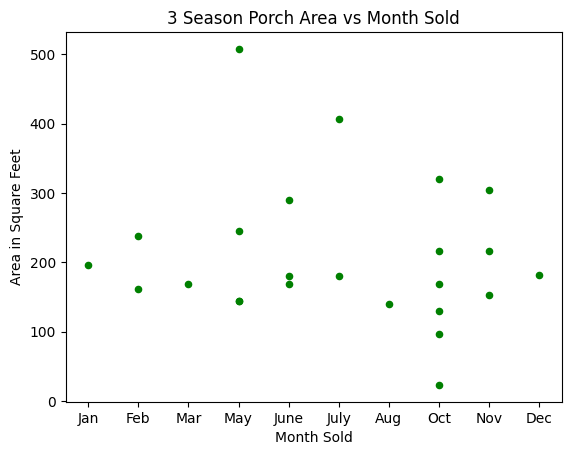

In [21]:
closed = house_df.query('EnclosedPorch != 0')
screen = house_df.query('ScreenPorch != 0')
season = house_df.query('SeasonalPorch != 0')

plt.scatter(closed['MoSold'],closed['EnclosedPorch'], color= 'r')
plt.title("Enclosed Porch Area vs Month Sold")
plt.xlabel("Month Sold")
plt.ylabel('Area in Square Feet')
screen.plot.scatter('MoSold','ScreenPorch', color= 'b')
plt.title("Screen Porch Area vs Month Sold")
plt.xlabel('Month Sold')
plt.ylabel('Area in Square Feet')
season.plot.scatter('MoSold','SeasonalPorch', color= 'g')
plt.title('3 Season Porch Area vs Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Area in Square Feet')

## <h3>3.B.) Summary</h3>
<p style = "font-size: 16px;">These plots differ dramatically and have very different trends and correlations. When looking at the distribution of enclosed porch area versus the month sold, we can see that it starts out with a very steady upwards trend until July, at which point there is a sudden drop in the amount of square footage of porch that is included with houses that are sold. This may indicate that buyers are less interested in houses with enclosed porches during the summer months, or that the supply of such houses is lower at that time. Further analysis would be needed to determine the exact cause of this trend. The next would be screened portch area for houses sold in each month and right off the bat, we see that the data is more sparse for this type of porch. You can work out a very slight increasing trend amoung the amount of square footage of porch a house is sold with. Just like with the enclosed porch area, we see a huge spike in sales in the summer months of June and July, but this time the datapoints are mainly outliers as we see the majority of the large screened porches (>300 Square Feet) being sold. Lastly, we see that the three season porch plot is even more sparse then the screened porches before it. This makes it very difficult to see if a 3 season porch has any correlation with month at all. More data of houses with 3 season porch sales will be needed to say something about it's trend.</p>

--------------------------------------------------------------------------

## <h2>4.) Porch Type Distributions</h2><br><h3>4.A.) Enclosed Porche Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;">We would like to better examine the trend of the porch area a house has vs the month it was sold. We can accomplish this by making a violin plot of each.</p>

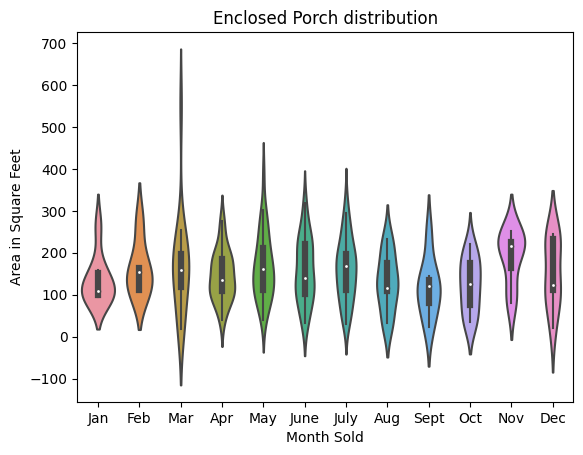

In [22]:
import seaborn

fig, ax = plt.subplots()

seaborn.violinplot(ax = ax,
               data = closed,
               x = 'MoSold',
               order = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
               y = 'EnclosedPorch',
               hue = None,
               split = True)
plt.title("Enclosed Porch distribution")
plt.xlabel('Month Sold')
plt.ylabel('Area in Square Feet')
plt.show()

## <h3>3.B.) Summary</h3>
<p style = "font-size: 16px;">We see that the average of each month stays relatively steady with small peaks and valleys up until about July which is the exact same trend that we saw in the scatter plot in 3.B.) proving our intuition about that trend correct. Within this January to June time frame we also can look at the distribution of porch area per month. It is obvious that January had a very 'bottom-heavy' distribution where the most houses were sold with low porch area compared to any month. However, this bottom heavy distribution seems to fade after Febuary leading to March which has a very skinny distribution. This can be equated to the obvious outlier (or outliers) that the month had. we see that the distribution seems get back to the way it was in April and then we get to the summer months which all have a more symmetric distribution, but still a very similar average. After the summer months we see a dip in sales with greater (> ~100 Square Feet) square footage of porches with a sudden increase in November. This month we see that there is a 'top-heavy' distribution with the greatest average out of every month. Then we see our lowest average with December. The trend so far is that summer months generally see the most consistent porch sales, while other months have more of an unpredictible distribution.</p>

## <h3>4.B.) Screened Porch Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

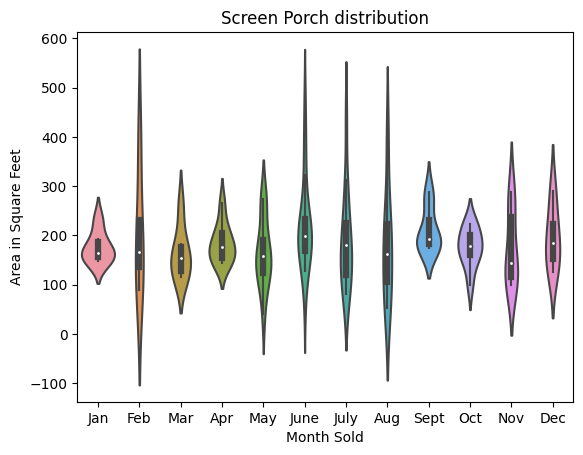

In [23]:
fig, ax = plt.subplots()

seaborn.violinplot(ax = ax,
               data = screen,
               x = 'MoSold',
                order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
               y = 'ScreenPorch',
               hue = None,
               split = True)
plt.title("Screen Porch distribution")
plt.xlabel('Month Sold')
plt.ylabel('Area in Square Feet')
plt.show()

## <h3>3.B.) Summary</h3>
<p style = "font-size: 16px;">For the screen porch scatter plot, we see a stark contrast from the last in that the averages are more scattered and do </p>

## <h3>4.C.) 3-Season Porch Area VS Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

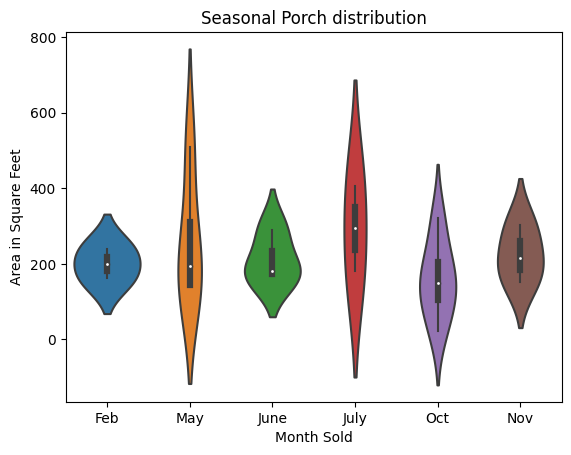

In [24]:
fig, ax = plt.subplots()

seaborn.violinplot(ax = ax,
               data = season,
               x = 'MoSold',
                   order=['Feb','May','June','July','Oct','Nov'],
               y = 'SeasonalPorch',
               hue = None,
               split = True)
plt.title("Seasonal Porch distribution")
plt.xlabel('Month Sold')
plt.ylabel('Area in Square Feet')
plt.show()

--------------------------------------------------------------------------

## <h2>5.) FirePlace Correlation Data</h2><br><h3>5.A.) Mean Sales Prices by Fireplace and Month Sold</h3>
<br>
<p style = "font-size: 16px;"></p>

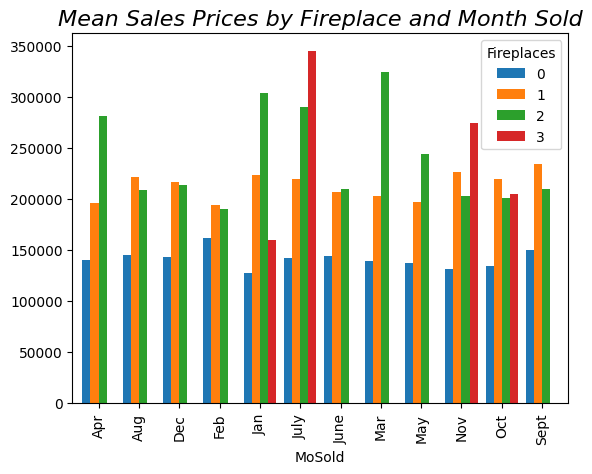

In [25]:
## Group the data by the 'Fireplace' column and the 'MoSold' column
grouped_data = house_df.groupby(['Fireplaces', 'MoSold'])

## Calculate the mean sales price for each group
mean_sales_price = grouped_data['SalePrice'].mean()

## Unstack the grouped data to create a DataFrame with one column per 'Fireplace' value
unstacked_data = mean_sales_price.unstack(level=0)


xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
## Plot the resulting DataFrame using a bar chart with thicker bars and the specified x-axis tick labels
unstacked_data.plot(kind='bar', width=0.8)
plt.title("Mean Sales Prices by Fireplace and Month Sold", fontsize=16, fontstyle='italic')
plt.show()

## <h3>5.B.) Fireplace Qualiy VS Price of House Sold</h3>
<br>
<p style = "font-size: 16px;">We originally considered dropping the 'FireplaceQu' column due to a high percentage of NAN values, but decided to analyze the non-NAN values in relation to home sale prices.</p>

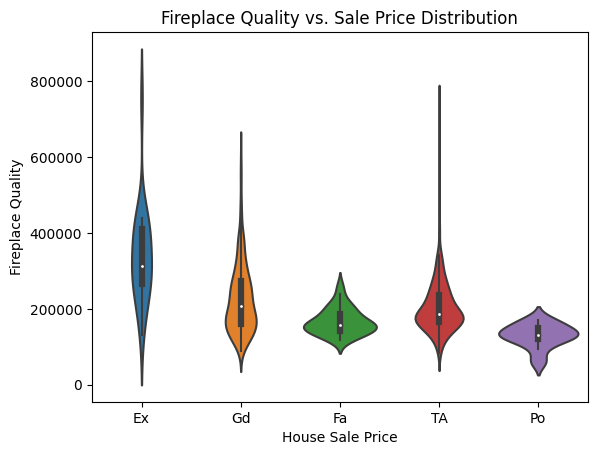

In [26]:
fig, ax = plt.subplots()
seaborn.violinplot(ax = ax,
               data = house_df,
               x = 'FireplaceQu',
               y = 'SalePrice',
               hue = None,
               split = True)
plt.title("Fireplace Quality vs. Sale Price Distribution")
plt.xlabel('House Sale Price')
plt.ylabel('Fireplace Quality')
plt.show()

-------------------------------------------------------------
## <h2>6.) The Garage Trials</h2><br><h3>6.A.) Trends in Garage Types VS Month of Sale</h3>
<br>
<p style = "font-size: 16px;"></p>

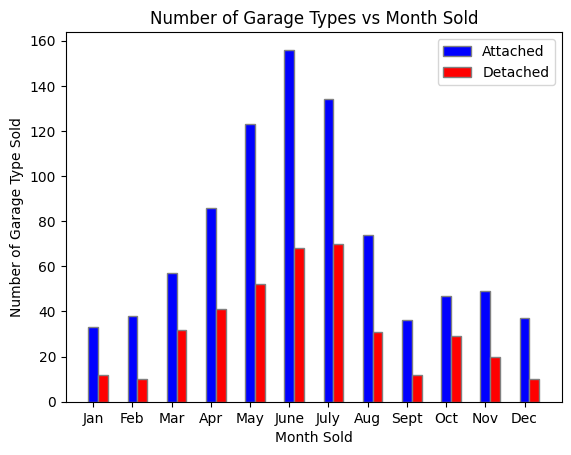

In [27]:
X = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
det = []
att = []
for i in range(0,12):
    month = house_df.loc[house_df['MoSold'] == X[i]]
    month_att = month['GarageType'].value_counts()['Attchd']
    month_det = month['GarageType'].value_counts()['Detchd']
    att.append(month_att)
    det.append(month_det)

   
br1 = np.arange(len(X))
br2 = [X + 0.25 for X in br1]
plt.bar(X,att,color='blue', width = 0.25,
        edgecolor ='grey', label ='Attached')
plt.bar(br2,det, color='red', width = 0.25,
        edgecolor ='grey', label ='Detached')
plt.legend()
plt.title("Number of Garage Types vs Month Sold")
plt.xlabel('Month Sold')
plt.ylabel('Number of Garage Type Sold')
plt.show()

-------------------------------------------------------------
## <h2>7.) Cold Yet?</h2><br><h3>7.A.) Number of Houses Sold by Heating/Cooling Quality and Month</h3>
<br>
<p style = "font-size: 16px;"></p>

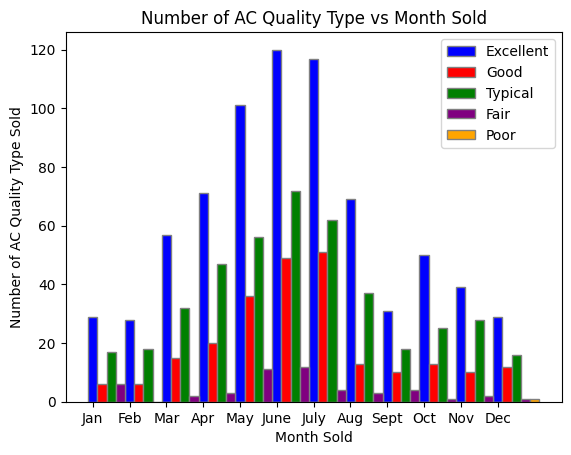

In [28]:
barWidth = 0.25
ex = []
gd = []
ta = []
fa = []
po = []

for i in range(0,12):
    month = house_df.loc[house_df['MoSold'] == X[i]]
    if 'Ex' in month.values:
        E = month['HeatingQC'].value_counts()['Ex']
        ex.append(E)
    else:
        ex.append(0)
        
    if 'Gd' in month['HeatingQC'].values:
        G = month['HeatingQC'].value_counts()['Gd']
        gd.append(G)
    else:
        gd.append(0)
        
    if 'Fa' in month['HeatingQC'].values:
        F = month['HeatingQC'].value_counts()['Fa']
        fa.append(F)
    else:
        fa.append(0)
        
    if 'TA' in month['HeatingQC'].values:
        T = month['HeatingQC'].value_counts()['TA']
        ta.append(T)
    else:
        ta.append(0)
        
    if 'Po' in month['HeatingQC'].values:
        P = month['HeatingQC'].value_counts()['Po']
        po.append(P)
    else:
        po.append(0)

br1 = np.arange(len(X))
br2 = [X + barWidth for X in br1]
br3 = [X + barWidth for X in br2]
br4 = [X + barWidth for X in br3]
br5 = [X + barWidth for X in br4]

plt.bar(X,ex,color='blue', width = barWidth,
        edgecolor ='grey', label ='Excellent')
plt.bar(br2,gd, color='red', width = barWidth,
        edgecolor ='grey', label ='Good')
plt.bar(br3,ta, color='green', width = barWidth,
        edgecolor ='grey', label ='Typical')
plt.bar(br4,fa, color='purple', width = barWidth,
        edgecolor ='grey', label ='Fair')
plt.bar(br5,po, color='orange', width = barWidth,
        edgecolor ='grey', label ='Poor')
plt.legend()
plt.title('Number of AC Quality Type vs Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Number of AC Quality Type Sold')
plt.show()

## <h2>8.) General Sale Price VS Month of Sale Distribution</h2><br><h3>7.A.) Sale Price VS Month Scattar Plot</h3>
<br>
<p style = "font-size: 16px;"></p>

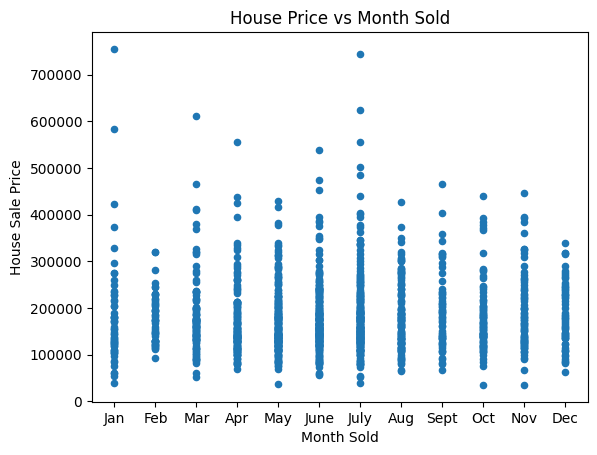

In [29]:
house_df.plot.scatter('MoSold','SalePrice')
plt.title('House Price vs Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('House Sale Price')
plt.show()
#Order x values

## <h3>8.B.) Sale Price VS Month Violin Plot</h3>
<br>
<p style = "font-size: 16px;"></p>

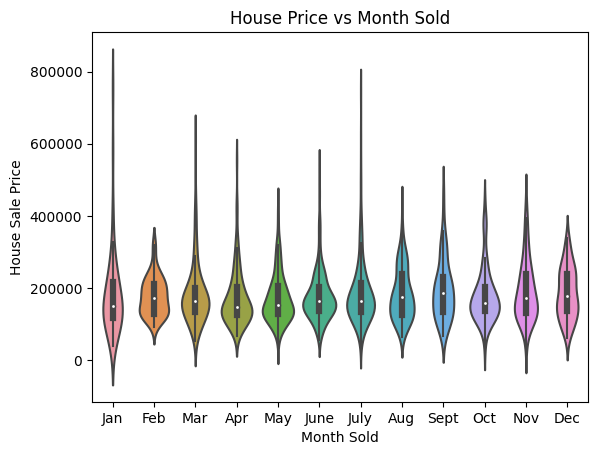

In [30]:
fig, ax = plt.subplots()
seaborn.violinplot(ax = ax,
               data = house_df,
               x = 'MoSold',
                order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
               y = 'SalePrice',
               hue = None,
               split = True)
plt.title("Month Sold vs. Sale Price Distribution")
plt.title('House Price vs Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('House Sale Price')
plt.show()